In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import datasets
import episodes
import plotting

#### Set random seeds for stable output:

In [3]:
np.random.seed(42)

## Load ID MNIST dataset

**MNIST License:** Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the [Creative Commons Attribution-Share Alike 3.0 license](https://creativecommons.org/licenses/by-sa/3.0/).

In [4]:
mnist_train, mnist_test = datasets.id_mnist.load_id_mnist()

Or load `id_mnist.npz` dataset: **_TODO(rpeloff) downloaded from online storage repo/CDN?_**

```python
    mnist_train, mnist_test = datasets.id_mnist.read_id_mnist_arch(path="data/id_mnist.npz")
```

In [5]:
for uid, data, label in zip(*mnist_train):
    print("Unique ID:", uid)
    print("Data shape:", data.shape)
    print("Target label:", label)
    break

Unique ID: 2ce86e4dae
Data shape: (28, 28)
Target label: 5


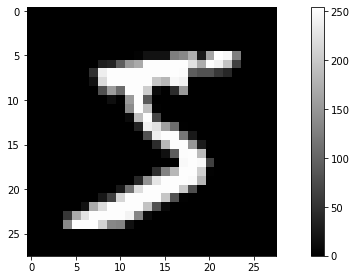

In [6]:
fig = plt.figure(figsize=(10, 4))
plt.imshow(data, interpolation="nearest", cmap="gray", origin="upper")
plt.colorbar(format="%.0f")
plt.tight_layout()

## Load TIDIGITS speech corpus

**TIDIGITS License:** [TIDIGITS](https://catalog.ldc.upenn.edu/LDC93S10) is distributed by Linguistic Data Consortium (LDC), and made available to LDC members as well as non-members under the [LDC User Agreement](https://catalog.ldc.upenn.edu/license/ldc-non-members-agreement.pdf).

Using Filterbanks here, but MFCC IDs and metadata are the same:

In [7]:
tidigits_train, tidigits_test = datasets.tidigits.extract_tidigits("speech_features/tidigits/extracted/features/fbank")

In [8]:
for uid, data, label, speaker, src_seq, production, fa_frames in zip(*tidigits_train):
    print("Unique ID:", uid)
    print("Data shape:", data.shape)
    print("Target label:", label)
    print("Utterance speaker:", speaker)
    print("Source sequence:", src_seq)
    print("Utterance production:", production)
    print("FA <start-end> frames:", fa_frames)
    break

Unique ID: o_mr_o3o5351a_a_000017-000045
Data shape: (28, 40)
Target label: o
Utterance speaker: mr
Source sequence: o3o5351a
Utterance production: a
FA <start-end> frames: 000017-000045


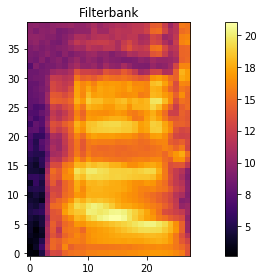

In [9]:
fig = plt.figure(figsize=(10, 4))
plt.imshow(data.T, interpolation="nearest", cmap="inferno", origin="lower")
plt.colorbar(format="%.0f")
plt.title("Filterbank")
plt.tight_layout()

## Create MNIST-TIDIGITS multimodal pairs

#### Analyse class distribution of each dataset:

In [10]:
print("mnist train size", mnist_train[2].shape)
print("tidigits train size", tidigits_train[0].shape)

mnist train size (60000,)
tidigits train size (28329,)


In [11]:
np.unique(mnist_train[2], return_counts=True)  # mnist train classes and class counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [12]:
np.unique(tidigits_train[2], return_counts=True)  # tidigits train classes and class counts

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'o', 'z'], dtype='<U1'),
 array([2593, 2586, 2577, 2582, 2545, 2596, 2576, 2567, 2545, 2568, 2594]))

In [13]:
print("mnist test size", mnist_test[2].shape)
print("tidigits test size", tidigits_test[0].shape)

mnist test size (10000,)
tidigits test size (28583,)


In [14]:
np.unique(mnist_test[2], return_counts=True)  # mnist test classes and class counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [15]:
np.unique(tidigits_test[2], return_counts=True)  # tidigits test classes and class counts

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'o', 'z'], dtype='<U1'),
 array([2601, 2625, 2607, 2599, 2599, 2610, 2600, 2614, 2562, 2557, 2609]))

#### Multimodal pair analysis:

Train set:
- 60,000 MNIST train images, split first 5000 as validation
- 28,329 TIDIGITS utterances, split first 5000 as validation
- almost 2 MNIST class examples per corresponding TIDIGITS class example (excluding 0->oh/zero, which has slighlty more than 1 class example)
- \>half of MNSIT train set will not be in random sampled pairs (exlcuding 0)
- repeat TIDIGITS where each TIDIGITS class example appears 2-3 times while each MNIST class example appears exactly once

Test set:
- 10,000 MNIST test images
- 28,583 TIDIGITS utterances
- less than 0.5 MNIST class examples per corresponding TIDIGITS class example (excluding 0->oh/zero, which has less than 0.25 class examples)
- \>half of TIDIGITS test set will not be in random sampled pairs
- repeat MNIST where each TIDIGITS class example appears once while each MNIST class example appears 2-3 times (exluding 0 which appears 4-6 times)

#### Sample multimodal pairs:

In [16]:
mnist_val = tuple((x[:5000] for x in mnist_train))
mnist_train = tuple((x[5000:] for x in mnist_train))
tidigits_val = tuple((x[:5000] for x in tidigits_train))
tidigits_train = tuple((x[5000:] for x in tidigits_train))

In [17]:
mnist_tidigits_train = datasets.multimodal.sample_multimodal_pairs(
    mnist_train[2], tidigits_train[2], datasets.multimodal.mnsit_tidigits_image_to_speech_labels)
mnist_tidigits_val = datasets.multimodal.sample_multimodal_pairs(
    mnist_val[2], tidigits_val[2], datasets.multimodal.mnsit_tidigits_image_to_speech_labels)
mnist_tidigits_test = datasets.multimodal.sample_multimodal_pairs(
    mnist_test[2], tidigits_test[2], datasets.multimodal.mnsit_tidigits_image_to_speech_labels)

In [18]:
mnist_train[2][mnist_tidigits_train[0]]  # multimodal paired mnist train set

array([1, 8, 2, ..., 6, 5, 1], dtype=uint8)

In [19]:
tidigits_train[2][mnist_tidigits_train[1]]  # multimodal paired tidigits train set

array(['1', '8', '2', ..., '6', '5', '1'], dtype='<U1')

In [20]:
print("multimodal paired mnist train size", mnist_train[2][mnist_tidigits_train[0]].shape)
print("multimodal paired tidigits train size", tidigits_train[2][mnist_tidigits_train[1]].shape)

multimodal paired mnist train size (60444,)
multimodal paired tidigits train size (60444,)


#### Read multimodal pair UIDs from previously generated csv files:

In [21]:
mnist_train_uids, tidigits_train_uids = datasets.multimodal.read_mnist_tidigits_csv(path="data/mnist_tidigits/train.csv")
mnist_val_uids, tidigits_val_uids = datasets.multimodal.read_mnist_tidigits_csv(path="data/mnist_tidigits/val.csv")
mnist_test_uids, tidigits_test_uids = datasets.multimodal.read_mnist_tidigits_csv(path="data/mnist_tidigits/test.csv")

## Use UIDs to generate paired multimodal datasets including data and meta-data

In [22]:
for pair in zip(mnist_train_uids[:5], tidigits_train_uids[:5]):
    print(pair)

('ca8b0b9e6d', '1_ac_1o1a_b_000077-000118')
('16f8e5ece1', '8_eg_218a_a_000077-000118')
('486b9211d2', '2_pe_4o526a_a_000089-000103')
('682ab03030', '9_pb_9a_a_000041-000093')
('e68b97b837', 'z_sp_zzz7a_c_000104-000146')


In [23]:
paired_mnist_idx = np.where(mnist_train[0] == np.expand_dims(mnist_train_uids, axis=-1))[1]
paired_mnist_train = tuple((x[paired_mnist_idx] for x in mnist_train))

In [24]:
assert np.array_equal(paired_mnist_train[0], mnist_train_uids)

In [25]:
for uid, data, label in zip(*paired_mnist_train):
    print("Unique ID:", uid)
    print("Data shape:", data.shape)
    print("Target label:", label)
    break

Unique ID: ca8b0b9e6d
Data shape: (28, 28)
Target label: 1


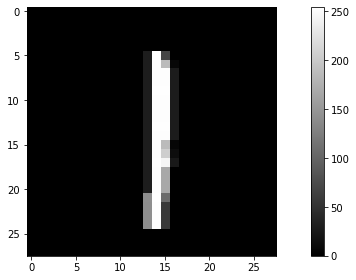

In [26]:
fig = plt.figure(figsize=(10, 4))
plt.imshow(data, interpolation="nearest", cmap="gray", origin="upper")
plt.colorbar(format="%.0f")
plt.tight_layout()

In [27]:
paired_tidigits_idx = np.where(tidigits_train[0] == np.expand_dims(tidigits_train_uids, axis=-1))[1]
paired_tidigits_train = tuple((x[paired_tidigits_idx] for x in tidigits_train))

In [28]:
assert np.array_equal(paired_tidigits_train[0], tidigits_train_uids)

In [29]:
for uid, data, label, speaker, src_seq, production, fa_frames in zip(*paired_tidigits_train):
    print("Unique ID:", uid)
    print("Data shape:", data.shape)
    print("Target label:", label)
    print("Utterance speaker:", speaker)
    print("Source sequence:", src_seq)
    print("Utterance production:", production)
    print("FA <start-end> frames:", fa_frames)
    break

Unique ID: 1_ac_1o1a_b_000077-000118
Data shape: (41, 40)
Target label: 1
Utterance speaker: ac
Source sequence: 1o1a
Utterance production: b
FA <start-end> frames: 000077-000118


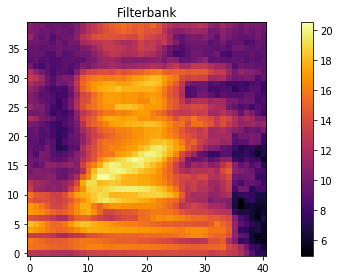

In [30]:
fig = plt.figure(figsize=(10, 4))
plt.imshow(data.T, interpolation="nearest", cmap="inferno", origin="lower")
plt.colorbar(format="%.0f")
plt.title("Filterbank")
plt.tight_layout()

## Test one-shot episode sampling function (unimodal)

#### MNIST 1-shot 5-way episode example:

In [31]:
ep_gen = episodes.generate_episodes(mnist_test[0], mnist_test[2], n_episodes=600, n_queries=15, k_shot=1, l_way=5, shuffle=False)
for support_idx, query_idx in ep_gen:
    print("Support set")
    print("Label:", mnist_test[2][support_idx])
    print("UID:", mnist_test[0][support_idx])
    print("\nQuery set")
    print("Label:", mnist_test[2][query_idx])
    print("UID:", mnist_test[0][query_idx])
    break

Support set
Label: [1 0 4 5 8]
UID: ['7dd50f2458' '5bbb641eb2' '236aaeb7e4' '99c3d7435d' '8ac5dbc2fd']

Query set
Label: [1 1 0 0 0 0 4 4 5 5 8 8 8 8 8]
UID: ['cef3840036' 'bdc8c23450' '026f61bb1a' '0dbb4e4e65' 'afd6b68c55'
 '6f5dc2f66c' '5f5773a9c1' '5e2c88e81b' '5531297d98' 'dbfeda1769'
 '8b8ff84c2a' 'a28538c9dc' '3e8c37c9e4' '0d0bf61e33' '592d4b625d']


Support set
Saving figure figures/mnist_support_set_1-shot_5-way.png


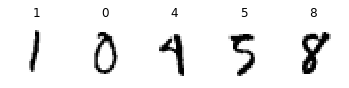

Query set
Saving figure figures/mnist_query_set_1-shot_5-way.png


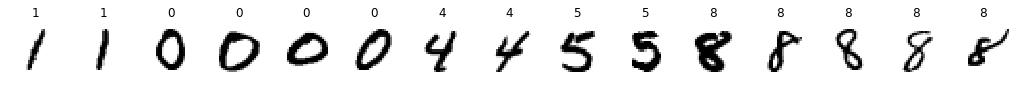

In [32]:
print("Support set")
plotting.plot_support_set(
    mnist_test[1][support_idx], mnist_test[2][support_idx],
    k_shot=1, l_way=5, fig_id="mnist_support_set_1-shot_5-way", cmap="binary", origin="upper")
print("Query set")
plotting.plot_query_set(
    mnist_test[1][query_idx], mnist_test[2][query_idx],
    n_queries=15, max_cols=15, fig_id="mnist_query_set_1-shot_5-way", cmap="binary", origin="upper")

#### MNIST 5-shot 5-way episode example:

In [33]:
ep_gen = episodes.generate_episodes(mnist_test[0], mnist_test[2], n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False)
for support_idx, query_idx in ep_gen:
    print("Support set")
    print("Label:", mnist_test[2][support_idx])
    print("UID:", mnist_test[0][support_idx])
    print("\nQuery set")
    print("Label:", mnist_test[2][query_idx])
    print("UID:", mnist_test[0][query_idx])
    break

Support set
Label: [4 4 4 4 4 2 2 2 2 2 5 5 5 5 5 6 6 6 6 6 3 3 3 3 3]
UID: ['f1d67d9f88' '0d89335fe6' 'ec45cf0fe0' '8b3d99662b' '756213df5a'
 '5fa088aa07' '4a6177b252' '50ba6180b2' '4fd5890515' 'df9b4a54e4'
 'ffbeac1cef' 'c5bc63e397' '22824a4f85' 'ff4c7e4890' 'efdc579ab2'
 '9a28633efb' 'd8de7c4d1f' '2aba9bd5e0' '82e6433535' '694593e41c'
 '4981943713' 'b9cd313919' 'a4956022b0' 'a9af5af0d9' '66e2e79a0d']

Query set
Label: [4 2 5 5 5 5 5 6 6 6 6 6 3 3 3]
UID: ['22741498eb' '5f8dca22c4' '878f662fb6' '7c01f9ec6a' '4d6a4a7eeb'
 '2273312b74' 'd3d96c9f18' 'b4f7734a96' 'fe23b74635' 'e9488e709e'
 '8e18320d54' 'a104c1bd7c' 'd2e0905381' 'ab47db0a20' '65152370be']


Support set
Saving figure figures/mnist_support_set_5-shot_5-way.png


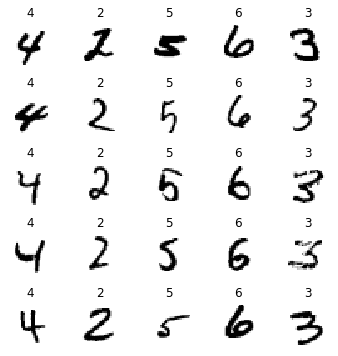

Query set
Saving figure figures/mnist_query_set_5-shot_5-way.png


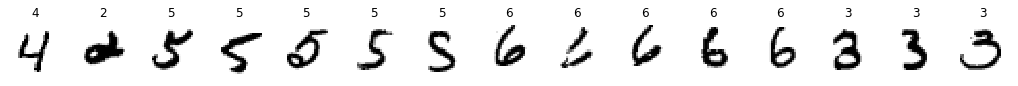

In [34]:
print("Support set")
plotting.plot_support_set(
    mnist_test[1][support_idx], mnist_test[2][support_idx],
    k_shot=5, l_way=5, fig_id="mnist_support_set_5-shot_5-way", cmap="binary", origin="upper")
print("Query set")
plotting.plot_query_set(
    mnist_test[1][query_idx], mnist_test[2][query_idx],
    n_queries=15, max_cols=15, fig_id="mnist_query_set_5-shot_5-way", cmap="binary", origin="upper")

#### TIDigits 1-shot 5-way episode example:

In [35]:
ep_gen = episodes.generate_episodes(tidigits_test[0], tidigits_test[2],
                                    speakers=tidigits_test[3],
                                    n_episodes=600, n_queries=15, k_shot=1, l_way=5, shuffle=False,
                                    speaker_mode="baseline")
for support_idx, query_idx in ep_gen:
    print("Support set")
    print("Label:", tidigits_test[2][support_idx])
    print("Speaker:", tidigits_test[3][support_idx])
    print("UID:", tidigits_test[0][support_idx])
    print("\nQuery set")
    print("Label:", tidigits_test[2][query_idx])
    print("Speaker:", tidigits_test[3][query_idx])
    print("UID:", tidigits_test[0][query_idx])
    break

Support set
Label: ['9' '6' '7' '1' 'z']
Speaker: ['lp' 'er' 'ak' 'nl' 'er']
UID: ['9_lp_869a_a_000124-000173' '6_er_8672a_a_000043-000078'
 '7_ak_77278a_c_000143-000184' '1_nl_1457a_a_000018-000045'
 'z_er_9824za_a_000128-000178']

Query set
Label: ['9' '9' '9' '9' '9' '9' '9' '9' '6' '6' '6' '7' '1' '1' 'z']
Speaker: ['bf' 'ft' 'kb' 'rl' 'ew' 'ed' 'fs' 'pt' 'jw' 'ed' 'bj' 'gn' 'gm' 'gk'
 'ce']
UID: ['9_bf_9a_a_000047-000104' '9_ft_12439a_a_000175-000221'
 '9_kb_5z39a_a_000148-000197' '9_rl_9a_a_000041-000087'
 '9_ew_479a_a_000091-000135' '9_ed_62o9oa_a_000119-000154'
 '9_fs_79o37a_a_000060-000087' '9_pt_z939441a_a_000056-000093'
 '6_jw_8z6z444a_a_000077-000123' '6_ed_56o6362a_a_000069-000104'
 '6_bj_67a_a_000025-000055' '7_gn_7342a_a_000018-000067'
 '1_gm_z183za_a_000069-000096' '1_gk_8427861a_a_000219-000258'
 'z_ce_6z5z8a_a_000056-000093']


Support set
Saving figure figures/tidigits_support_set_1-shot_5-way.png


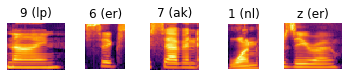

Query set
Saving figure figures/tidigits_query_set_1-shot_5-way.png


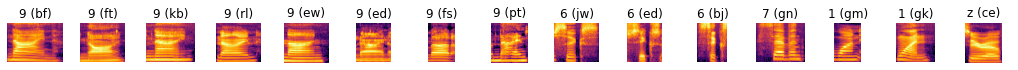

In [36]:
print("Support set")
plotting.plot_support_set(
    plotting.transpose_variable_array(tidigits_test[1][support_idx]),
    tidigits_test[2][support_idx],
    speakers=tidigits_test[3][support_idx],
    k_shot=1, l_way=5, fig_id="tidigits_support_set_1-shot_5-way", cmap="inferno")
print("Query set")
plotting.plot_query_set(
    plotting.transpose_variable_array(tidigits_test[1][query_idx]),
    tidigits_test[2][query_idx],
    speakers=tidigits_test[3][query_idx],
    n_queries=15, max_cols=15, fig_id="tidigits_query_set_1-shot_5-way", cmap="inferno")

#### TIDigits 5-shot 5-way episode example:

In [37]:
ep_gen = episodes.generate_episodes(tidigits_test[0], tidigits_test[2],
                                    speakers=tidigits_test[3],
                                    n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False,
                                    speaker_mode="baseline")
for support_idx, query_idx in ep_gen:
    print("Support set")
    print("Label:", tidigits_test[2][support_idx])
    print("Speaker:", tidigits_test[3][support_idx])
    print("UID:", tidigits_test[0][support_idx])
    print("\nQuery set")
    print("Label:", tidigits_test[2][query_idx])
    print("Speaker:", tidigits_test[3][query_idx])
    print("UID:", tidigits_test[0][query_idx])
    break

Support set
Label: ['6' '6' '6' '6' '6' '3' '3' '3' '3' '3' '9' '9' '9' '9' '9' 'o' 'o' 'o'
 'o' 'o' '1' '1' '1' '1' '1']
Speaker: ['bn' 'ip' 'bc' 'gp' 'rg' 'ak' 'fr' 'nl' 'gs' 'tb' 'cs' 'hc' 'gl' 'dp'
 'lp' 'jd' 'fm' 'er' 'bj' 'fs' 'ap' 'ah' 'pc' 'll' 'rl']
UID: ['6_bn_6a_a_000020-000073' '6_ip_84o6a_a_000086-000134'
 '6_bc_66z9a_a_000019-000053' '6_gp_765a_a_000068-000096'
 '6_rg_zz64a_a_000128-000167' '3_ak_3z3z9a_b_000098-000133'
 '3_fr_9o23o63a_b_000200-000238' '3_nl_33a_b_000049-000088'
 '3_gs_1z39z21a_a_000086-000140' '3_tb_24378zza_a_000062-000118'
 '9_cs_34976a_a_000112-000157' '9_hc_92o6a_a_000019-000056'
 '9_gl_2o91a_a_000081-000118' '9_dp_9b_a_000019-000067'
 '9_lp_9937589a_a_000019-000056' 'o_jd_8o83o61a_a_000070-000085'
 'o_fm_o98a_a_000015-000034' 'o_er_o9o8464a_b_000083-000112'
 'o_bj_2o6o7a_a_000078-000106' 'o_fs_o5575a_a_000018-000042'
 '1_ap_14a_a_000020-000045' '1_ah_111a_b_000054-000078'
 '1_pc_o169a_a_000085-000108' '1_ll_15729a_a_000019-000051'
 '1_rl_7176za_a_00

Support set
Saving figure figures/tidigits_support_set_5-shot_5-way.png


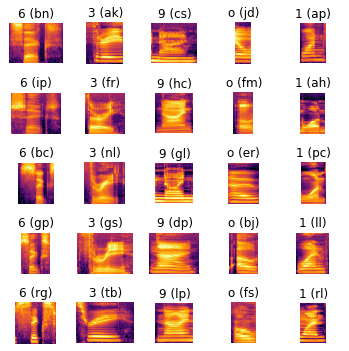

Query set
Saving figure figures/tidigits_query_set_5-shot_5-way.png


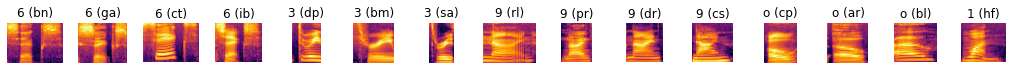

In [38]:
print("Support set")
plotting.plot_support_set(
    plotting.transpose_variable_array(tidigits_test[1][support_idx]),
    tidigits_test[2][support_idx],
    speakers=tidigits_test[3][support_idx],
    k_shot=5, l_way=5, fig_id="tidigits_support_set_5-shot_5-way", cmap="inferno")
print("Query set")
plotting.plot_query_set(
    plotting.transpose_variable_array(tidigits_test[1][query_idx]),
    tidigits_test[2][query_idx],
    speakers=tidigits_test[3][query_idx],
    n_queries=15, max_cols=15, fig_id="tidigits_query_set_5-shot_5-way", cmap="inferno")

## Test multimodal one-shot episode sampling function

#### Paired MNIST-TIDIGITS multimodal 1-shot 5-way episode example:

In [39]:
ep_gen = episodes.generate_multimodal_episodes(paired_mnist_train[0], paired_mnist_train[2],
                                               paired_tidigits_train[0], paired_tidigits_train[2],
                                               datasets.multimodal.mnsit_tidigits_image_to_speech_labels,
                                               speakers=paired_tidigits_train[3],
                                               n_episodes=600, n_queries=15, k_shot=1, l_way=5, shuffle=False,
                                               strict_one_shot_matching=True,
                                               speaker_mode="baseline")
for support_paired_idx, query_speech_idx, matching_image_idx in ep_gen:
    print("Support set speech and images")
    print("MNIST label:", paired_mnist_train[2][support_paired_idx])
    print("TIDIGITS label:", paired_tidigits_train[2][support_paired_idx])
    print("MNIST UID:", paired_mnist_train[0][support_paired_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][support_paired_idx])
    
    print("\nQuery set speech")
    print("TIDIGITS label:", paired_tidigits_train[2][query_speech_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][query_speech_idx])
    
    print("\nMatching set images")
    print("MNIST label:", paired_mnist_train[2][matching_image_idx])
    print("MNIST UID:", paired_mnist_train[0][matching_image_idx])
    break

Support set speech and images
MNIST label: [0 4 1 5 7]
TIDIGITS label: ['o' '4' '1' '5' '7']
MNIST UID: ['13cee3d765' 'cdb436e8b4' 'f888d654ce' '74a843b5a1' '340efa99db']
TIDIGITS UID: ['o_mm_9829oa_a_000208-000257' '4_jp_54434a_b_000093-000131'
 '1_fk_81a_a_000053-000107' '5_nc_5a_a_000035-000108'
 '7_st_2745a_a_000056-000095']

Query set speech
TIDIGITS label: ['o' 'o' 'o' 'o' '4' '1' '1' '1' '1' '5' '5' '5' '7' '7' '7']
TIDIGITS UID: ['o_fc_11462o8a_a_000218-000249' 'o_lh_oo1o714a_c_000148-000189'
 'o_ag_o97a_a_000038-000056' 'o_dn_84oo77oa_b_000118-000137'
 '4_kn_4o31a_a_000017-000044' '1_ai_2411a_a_000081-000111'
 '1_ld_46842o1a_a_000217-000262' '1_dc_1a_a_000046-000089'
 '1_jp_682o1a_a_000166-000210' '5_cl_5a_a_000043-000106'
 '5_nf_z5zz2a_a_000049-000083' '5_dn_6955a_a_000117-000150'
 '7_cm_987oa_a_000078-000124' '7_mh_7o18a_a_000020-000065'
 '7_if_79z7a_a_000019-000048']

Matching set images
MNIST label: [0 4 1 5 7]
MNIST UID: ['2c88a763da' '7e2a5e2885' '19ee9f80f3' 'd2385e3a78

Support set speech and images
Saving figure figures/mnist_tidigits_support_set_1-shot_5-way.png


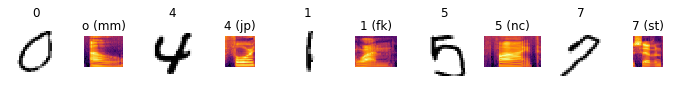

Query set speech
Saving figure figures/mnist_tidigits_query_set_1-shot_5-way.png


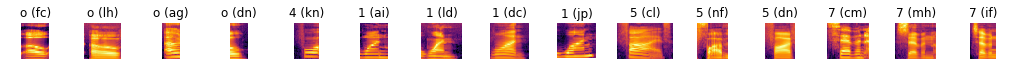

Matching set images
Saving figure figures/mnist_tidigits_matching_set_1-shot_5-way.png


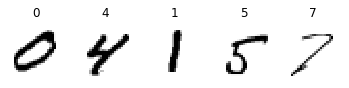

In [40]:
print("Support set speech and images")
plotting.plot_multimodal_support_set(
    paired_mnist_train[1][support_paired_idx],
    paired_mnist_train[2][support_paired_idx],
    plotting.transpose_variable_array(paired_tidigits_train[1][support_paired_idx]),
    paired_tidigits_train[2][support_paired_idx],
    speakers=paired_tidigits_train[3][support_paired_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_support_set_1-shot_5-way",
    image_cmap="binary", speech_cmap="inferno", image_origin="upper", speech_origin="lower")
print("Query set speech")
plotting.plot_query_set(
    plotting.transpose_variable_array(paired_tidigits_train[1][query_speech_idx]),
    paired_tidigits_train[2][query_speech_idx],
    speakers=paired_tidigits_train[3][query_speech_idx],
    n_queries=15, max_cols=15, fig_id="mnist_tidigits_query_set_1-shot_5-way", cmap="inferno")
print("Matching set images")
plotting.plot_support_set(
    paired_mnist_train[1][matching_image_idx],
    paired_mnist_train[2][matching_image_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_matching_set_1-shot_5-way", cmap="binary", origin="upper")

#### Paired MNIST-TIDIGITS multimodal 5-shot 5-way episode example:

In [41]:
ep_gen = episodes.generate_multimodal_episodes(paired_mnist_train[0], paired_mnist_train[2],
                                               paired_tidigits_train[0], paired_tidigits_train[2],
                                               datasets.multimodal.mnsit_tidigits_image_to_speech_labels,
                                               speakers=paired_tidigits_train[3],
                                               n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False,
                                               strict_one_shot_matching=True,
                                               speaker_mode="baseline")
for support_paired_idx, query_speech_idx, matching_image_idx in ep_gen:
    print("Support set speech and images")
    print("MNIST label:", paired_mnist_train[2][support_paired_idx])
    print("TIDIGITS label:", paired_tidigits_train[2][support_paired_idx])
    print("MNIST UID:", paired_mnist_train[0][support_paired_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][support_paired_idx])
    
    print("\nQuery set speech")
    print("TIDIGITS label:", paired_tidigits_train[2][query_speech_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][query_speech_idx])
    
    print("\nMatching set images")
    print("MNIST label:", paired_mnist_train[2][matching_image_idx])
    print("MNIST UID:", paired_mnist_train[0][matching_image_idx])
    break

Support set speech and images
MNIST label: [8 8 8 8 8 5 5 5 5 5 4 4 4 4 4 9 9 9 9 9 3 3 3 3 3]
TIDIGITS label: ['8' '8' '8' '8' '8' '5' '5' '5' '5' '5' '4' '4' '4' '4' '4' '9' '9' '9'
 '9' '9' '3' '3' '3' '3' '3']
MNIST UID: ['97dcc8553e' 'b726ba2c80' '790758313d' '9a4570759a' 'b25a6e45ab'
 'b42bbd13fc' 'abe4aed10d' 'ad9b92b3d9' 'b8b857d820' '031766aa89'
 '836a71c7a9' '8743acb2ab' 'accfd3917c' 'fbebd29f2d' '5cb4a40b01'
 '952a89afd5' 'a215b4e983' '13629e9b39' '0b519d4a0e' '4acd41728f'
 '25598bb2e2' '48ca707c3f' 'cec1c7ee66' '1a8afe2650' '6747f6acf2']
TIDIGITS UID: ['8_hp_8z581a_b_000148-000170' '8_ni_28za_a_000046-000083'
 '8_dc_4z98z72a_a_000197-000224' '8_hg_2458442a_a_000136-000173'
 '8_ec_4181a_a_000073-000096' '5_eh_5o366a_a_000018-000067'
 '5_hl_55oa_b_000080-000121' '5_dl_8z25898a_a_000161-000202'
 '5_sp_86157a_a_000122-000156' '5_br_71551z3a_b_000173-000214'
 '4_mk_5425858a_a_000060-000087' '4_rr_14a_a_000050-000096'
 '4_aj_4198za_a_000018-000048' '4_fj_4zz4a_b_000126-000162'
 '

Support set speech and images
Saving figure figures/mnist_tidigits_support_set_1-shot_5-way.png


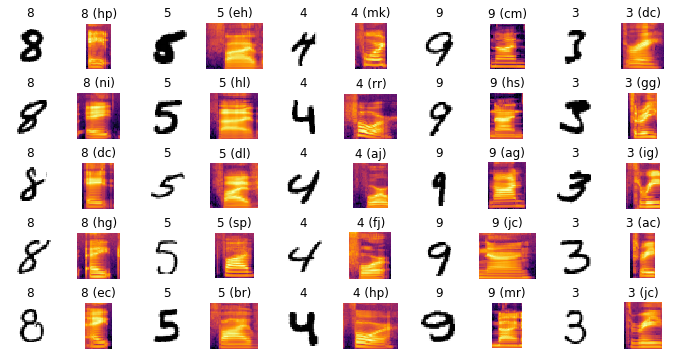

Query set speech
Saving figure figures/mnist_tidigits_query_set_1-shot_5-way.png


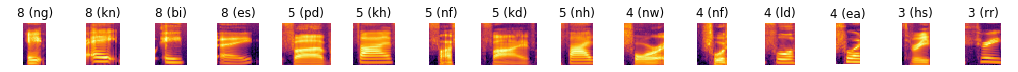

Matching set images
Saving figure figures/mnist_tidigits_matching_set_1-shot_5-way.png


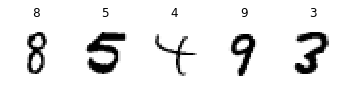

In [42]:
print("Support set speech and images")
plotting.plot_multimodal_support_set(
    paired_mnist_train[1][support_paired_idx],
    paired_mnist_train[2][support_paired_idx],
    plotting.transpose_variable_array(paired_tidigits_train[1][support_paired_idx]),
    paired_tidigits_train[2][support_paired_idx],
    speakers=paired_tidigits_train[3][support_paired_idx],
    k_shot=5, l_way=5, fig_id="mnist_tidigits_support_set_1-shot_5-way",
    image_cmap="binary", speech_cmap="inferno", image_origin="upper", speech_origin="lower")
print("Query set speech")
plotting.plot_query_set(
    plotting.transpose_variable_array(paired_tidigits_train[1][query_speech_idx]),
    paired_tidigits_train[2][query_speech_idx],
    speakers=paired_tidigits_train[3][query_speech_idx],
    n_queries=15, max_cols=15, fig_id="mnist_tidigits_query_set_1-shot_5-way", cmap="inferno")
print("Matching set images")
plotting.plot_support_set(
    paired_mnist_train[1][matching_image_idx],
    paired_mnist_train[2][matching_image_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_matching_set_1-shot_5-way", cmap="binary", origin="upper")

## Test speaker modes

Already tested `"baseline"` speaker mode in above multimodal one-shot examples.

#### Paired MNIST-TIDIGITS multimodal 5-shot 5-way episode and `"easy"` speakers example:

In [43]:
ep_gen = episodes.generate_multimodal_episodes(paired_mnist_train[0], paired_mnist_train[2],
                                               paired_tidigits_train[0], paired_tidigits_train[2],
                                               datasets.multimodal.mnsit_tidigits_image_to_speech_labels,
                                               speakers=paired_tidigits_train[3],
                                               n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False,
                                               strict_one_shot_matching=True,
                                               speaker_mode="easy")
for support_paired_idx, query_speech_idx, matching_image_idx in ep_gen:
    print("Support set speech and images")
    print("MNIST label:", paired_mnist_train[2][support_paired_idx])
    print("TIDIGITS label:", paired_tidigits_train[2][support_paired_idx])
    print("MNIST UID:", paired_mnist_train[0][support_paired_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][support_paired_idx])
    
    print("\nQuery set speech")
    print("TIDIGITS label:", paired_tidigits_train[2][query_speech_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][query_speech_idx])
    
    print("\nMatching set images")
    print("MNIST label:", paired_mnist_train[2][matching_image_idx])
    print("MNIST UID:", paired_mnist_train[0][matching_image_idx])
    break

Support set speech and images
MNIST label: [4 4 4 4 4 8 8 8 8 8 2 2 2 2 2 9 9 9 9 9 5 5 5 5 5]
TIDIGITS label: ['4' '4' '4' '4' '4' '8' '8' '8' '8' '8' '2' '2' '2' '2' '2' '9' '9' '9'
 '9' '9' '5' '5' '5' '5' '5']
MNIST UID: ['6c8e774a70' '8f1f477f02' '4e56e49ca8' '7c369436b8' 'fdaee721cf'
 'ecb1f9724a' 'ddd615bf5c' '7bbfd34b66' 'c905fbf3c5' 'ce4f56b1b5'
 '384d8b5377' '01aa0a468e' '2982b18915' 'fe24841c48' '3f9c466ef4'
 '9e3e6d51a4' '647d5018a1' '6065a46340' '1626c5c759' '645bc96403'
 'cbf00f64a4' 'd9098ad788' 'ab8b9dc9c7' 'c9ed84df59' '848b3bdba1']
TIDIGITS UID: ['4_jr_o4919a_a_000039-000068' '4_jr_46a_a_000017-000044'
 '4_jr_4zz4441a_c_000147-000174' '4_jr_489a_a_000017-000046'
 '4_jr_oo73412a_a_000138-000168' '8_rd_8551z32a_a_000017-000036'
 '8_rd_88o9a_a_000039-000060' '8_rd_285a_a_000056-000076'
 '8_rd_8a_a_000018-000050' '8_rd_88o9a_b_000060-000085'
 '2_kt_21844a_a_000041-000062' '2_kt_4o63266a_a_000133-000155'
 '2_kt_3255a_a_000046-000069' '2_kt_o42a_a_000072-000117'
 '2_kt_2438

Support set speech and images
Saving figure figures/mnist_tidigits_support_set_5-shot_5-way_easy_speaker.png


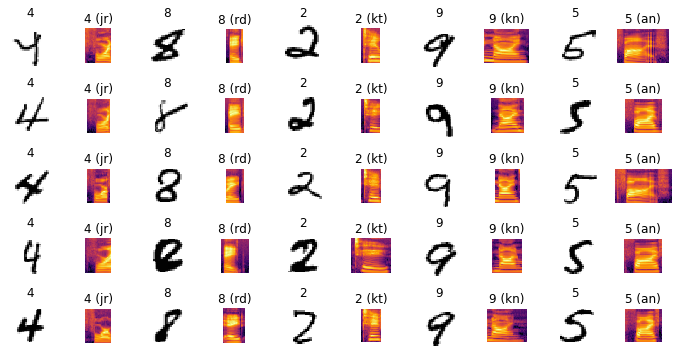

Query set speech
Saving figure figures/mnist_tidigits_query_set_5-shot_5-way_easy_speaker.png


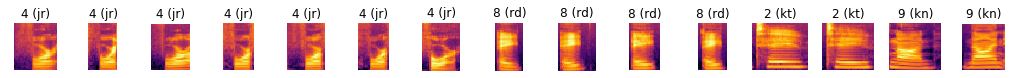

Matching set images
Saving figure figures/mnist_tidigits_matching_set_5-shot_5-way_easy_speaker.png


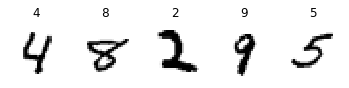

In [44]:
print("Support set speech and images")
plotting.plot_multimodal_support_set(
    paired_mnist_train[1][support_paired_idx],
    paired_mnist_train[2][support_paired_idx],
    plotting.transpose_variable_array(paired_tidigits_train[1][support_paired_idx]),
    paired_tidigits_train[2][support_paired_idx],
    speakers=paired_tidigits_train[3][support_paired_idx],
    k_shot=5, l_way=5, fig_id="mnist_tidigits_support_set_5-shot_5-way_easy_speaker",
    image_cmap="binary", speech_cmap="inferno", image_origin="upper", speech_origin="lower")
print("Query set speech")
plotting.plot_query_set(
    plotting.transpose_variable_array(paired_tidigits_train[1][query_speech_idx]),
    paired_tidigits_train[2][query_speech_idx],
    speakers=paired_tidigits_train[3][query_speech_idx],
    n_queries=15, max_cols=15, fig_id="mnist_tidigits_query_set_5-shot_5-way_easy_speaker", cmap="inferno")
print("Matching set images")
plotting.plot_support_set(
    paired_mnist_train[1][matching_image_idx],
    paired_mnist_train[2][matching_image_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_matching_set_5-shot_5-way_easy_speaker", cmap="binary", origin="upper")

#### Paired MNIST-TIDIGITS multimodal 5-shot 5-way episode and `"hard"` speakers example:

In [45]:
ep_gen = episodes.generate_multimodal_episodes(paired_mnist_train[0], paired_mnist_train[2],
                                               paired_tidigits_train[0], paired_tidigits_train[2],
                                               datasets.multimodal.mnsit_tidigits_image_to_speech_labels,
                                               speakers=paired_tidigits_train[3],
                                               n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False,
                                               strict_one_shot_matching=True,
                                               speaker_mode="hard")
for support_paired_idx, query_speech_idx, matching_image_idx in ep_gen:
    print("Support set speech and images")
    print("MNIST label:", paired_mnist_train[2][support_paired_idx])
    print("TIDIGITS label:", paired_tidigits_train[2][support_paired_idx])
    print("MNIST UID:", paired_mnist_train[0][support_paired_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][support_paired_idx])
    
    print("\nQuery set speech")
    print("TIDIGITS label:", paired_tidigits_train[2][query_speech_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][query_speech_idx])
    
    print("\nMatching set images")
    print("MNIST label:", paired_mnist_train[2][matching_image_idx])
    print("MNIST UID:", paired_mnist_train[0][matching_image_idx])
    break

Support set speech and images
MNIST label: [6 6 6 6 6 0 0 0 0 0 3 3 3 3 3 4 4 4 4 4 0 0 0 0 0]
TIDIGITS label: ['6' '6' '6' '6' '6' 'z' 'z' 'z' 'z' 'z' '3' '3' '3' '3' '3' '4' '4' '4'
 '4' '4' 'o' 'o' 'o' 'o' 'o']
MNIST UID: ['d8231c3019' 'ca2bce7f3f' '31037f9283' '19a994da2c' '060de63937'
 '21b9b1d229' '5d655f4077' 'cafe680dfc' 'fa0a871d51' 'b574a70432'
 '0c8cf158aa' '57b666f892' 'b132847f46' '94e2debb68' 'baa3997352'
 '75aa6d2411' '75d2c45de1' '5d6d2c55fa' '4417701d25' 'af795b80dd'
 'e80d24b883' '632dc68c91' 'f03ede6a6d' 'e6418a096b' '567ac36e34']
TIDIGITS UID: ['6_mp_zz566a_a_000157-000204' '6_if_z4613a_a_000081-000112'
 '6_ie_4o6a_a_000102-000168' '6_re_867a_a_000067-000109'
 '6_ms_3764332a_a_000070-000102' 'z_st_683z8a_a_000121-000153'
 'z_jr_z6z9a_b_000096-000126' 'z_rs_3z4z5a_a_000051-000092'
 'z_ih_1227z33a_a_000184-000223' 'z_jr_zzz16a_c_000109-000145'
 '3_jj_3o5oa_a_000028-000056' '3_hp_3b_a_000039-000080'
 '3_es_3b_a_000017-000072' '3_sj_87375a_a_000084-000112'
 '3_eg_1152z4

Support set speech and images
Saving figure figures/mnist_tidigits_support_set_5-shot_5-way_hard_speaker.png


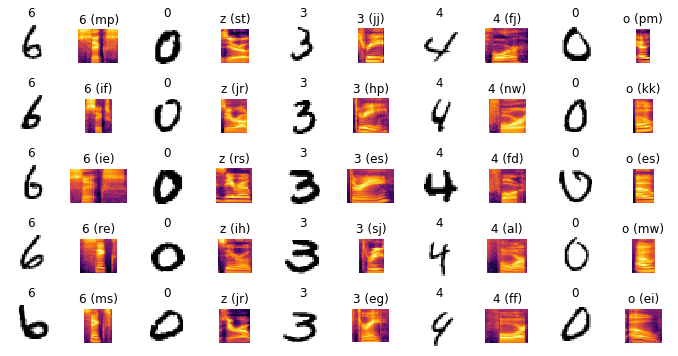

Query set speech
Saving figure figures/mnist_tidigits_query_set_5-shot_5-way_hard_speaker.png


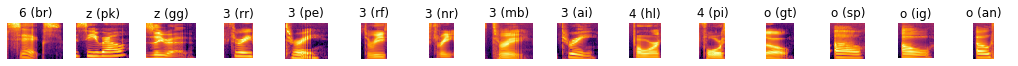

Matching set images
Saving figure figures/mnist_tidigits_matching_set_5-shot_5-way_hard_speaker.png


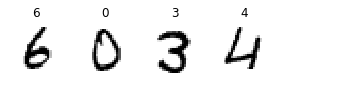

In [46]:
print("Support set speech and images")
plotting.plot_multimodal_support_set(
    paired_mnist_train[1][support_paired_idx],
    paired_mnist_train[2][support_paired_idx],
    plotting.transpose_variable_array(paired_tidigits_train[1][support_paired_idx]),
    paired_tidigits_train[2][support_paired_idx],
    speakers=paired_tidigits_train[3][support_paired_idx],
    k_shot=5, l_way=5, fig_id="mnist_tidigits_support_set_5-shot_5-way_hard_speaker",
    image_cmap="binary", speech_cmap="inferno", image_origin="upper", speech_origin="lower")
print("Query set speech")
plotting.plot_query_set(
    plotting.transpose_variable_array(paired_tidigits_train[1][query_speech_idx]),
    paired_tidigits_train[2][query_speech_idx],
    speakers=paired_tidigits_train[3][query_speech_idx],
    n_queries=15, max_cols=15, fig_id="mnist_tidigits_query_set_5-shot_5-way_hard_speaker", cmap="inferno")
print("Matching set images")
plotting.plot_support_set(
    paired_mnist_train[1][matching_image_idx],
    paired_mnist_train[2][matching_image_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_matching_set_5-shot_5-way_hard_speaker", cmap="binary", origin="upper")

#### Paired MNIST-TIDIGITS multimodal 5-shot 5-way episode and `"distractor"` speakers example:

In [47]:
ep_gen = episodes.generate_multimodal_episodes(paired_mnist_train[0], paired_mnist_train[2],
                                               paired_tidigits_train[0], paired_tidigits_train[2],
                                               datasets.multimodal.mnsit_tidigits_image_to_speech_labels,
                                               speakers=paired_tidigits_train[3],
                                               n_episodes=600, n_queries=15, k_shot=5, l_way=5, shuffle=False,
                                               strict_one_shot_matching=True,
                                               speaker_mode="distractor")
for support_paired_idx, query_speech_idx, matching_image_idx in ep_gen:
    print("Support set speech and images")
    print("MNIST label:", paired_mnist_train[2][support_paired_idx])
    print("TIDIGITS label:", paired_tidigits_train[2][support_paired_idx])
    print("MNIST UID:", paired_mnist_train[0][support_paired_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][support_paired_idx])
    
    print("\nQuery set speech")
    print("TIDIGITS label:", paired_tidigits_train[2][query_speech_idx])
    print("TIDIGITS UID:", paired_tidigits_train[0][query_speech_idx])
    
    print("\nMatching set images")
    print("MNIST label:", paired_mnist_train[2][matching_image_idx])
    print("MNIST UID:", paired_mnist_train[0][matching_image_idx])
    break

Support set speech and images
MNIST label: [3 3 3 3 3 9 9 9 9 9 2 2 2 2 2 6 6 6 6 6 0 0 0 0 0]
TIDIGITS label: ['3' '3' '3' '3' '3' '9' '9' '9' '9' '9' '2' '2' '2' '2' '2' '6' '6' '6'
 '6' '6' 'z' 'z' 'z' 'z' 'z']
MNIST UID: ['6e83a728b1' '1913fe5c5e' 'a2ac7acdc5' '6d7e264a84' '3b208827c1'
 '1da2e18031' 'f56157718e' 'ae76d27b9d' '6e5dac7b33' '6c626a27b3'
 '823676f84b' '1d0c532c67' '8a2a6f5e3a' 'a13da68ac6' '0ade0323da'
 'f982186b9e' 'ad0745d7c0' 'ea16b30622' '5882e6eb41' 'd1e6ffaa37'
 '3f898201b8' '48bb880342' 'ebabe413ec' '790658e944' 'b508784a80']
TIDIGITS UID: ['3_nh_3oo1537a_a_000033-000068' '3_nh_9o83a_a_000093-000148'
 '3_nh_33a_a_000021-000044' '3_nh_532a_a_000056-000080'
 '3_nh_8311a_a_000040-000069' '9_nr_22446z9a_a_000244-000286'
 '9_nr_69592a_b_000130-000169' '9_nr_289o9o4a_b_000140-000174'
 '9_nr_7889491a_a_000136-000166' '9_nr_9965a_b_000051-000079'
 '2_cg_7o237a_a_000144-000184' '2_cg_z2a_a_000095-000139'
 '2_cg_622a_b_000136-000179' '2_cg_622a_a_000089-000130'
 '2_cg_oo4

Support set speech and images
Saving figure figures/mnist_tidigits_support_set_5-shot_5-way_distractor_speaker.png


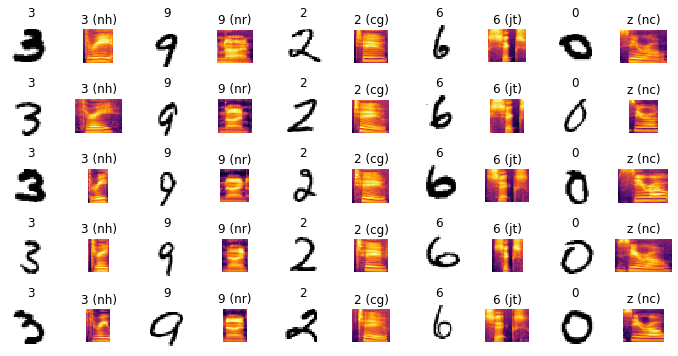

Query set speech
Saving figure figures/mnist_tidigits_query_set_5-shot_5-way_distractor_speaker.png


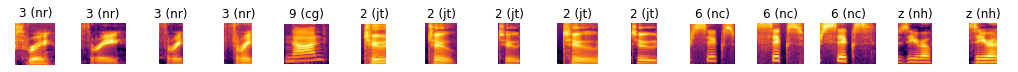

Matching set images
Saving figure figures/mnist_tidigits_matching_set_5-shot_5-way_distractor_speaker.png


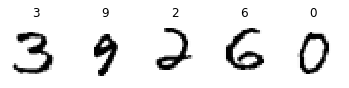

In [48]:
print("Support set speech and images")
plotting.plot_multimodal_support_set(
    paired_mnist_train[1][support_paired_idx],
    paired_mnist_train[2][support_paired_idx],
    plotting.transpose_variable_array(paired_tidigits_train[1][support_paired_idx]),
    paired_tidigits_train[2][support_paired_idx],
    speakers=paired_tidigits_train[3][support_paired_idx],
    k_shot=5, l_way=5, fig_id="mnist_tidigits_support_set_5-shot_5-way_distractor_speaker",
    image_cmap="binary", speech_cmap="inferno", image_origin="upper", speech_origin="lower")
print("Query set speech")
plotting.plot_query_set(
    plotting.transpose_variable_array(paired_tidigits_train[1][query_speech_idx]),
    paired_tidigits_train[2][query_speech_idx],
    speakers=paired_tidigits_train[3][query_speech_idx],
    n_queries=15, max_cols=15, fig_id="mnist_tidigits_query_set_5-shot_5-way_distractor_speaker", cmap="inferno")
print("Matching set images")
plotting.plot_support_set(
    paired_mnist_train[1][matching_image_idx],
    paired_mnist_train[2][matching_image_idx],
    k_shot=1, l_way=5, fig_id="mnist_tidigits_matching_set_5-shot_5-way_distractor_speaker", cmap="binary", origin="upper")